In [2]:
from eval import analyze_model

import pandas as pd
import torch
import numpy as np
from pmf import PMF
from lr import LogReg
import pickle
import plotnine
from plotnine import * 

SEED = 42
K_FOLDS = 5
REPLACEMENT_LEVELS = [25, 50, 100, 250, 500, 1000]
LATENT_FACTORS = [1, 2, 3, 4, 5]

In [35]:
men_df = pd.read_csv('data/men_data.csv')
women_df = pd.read_csv('data/women_data.csv')

### Climbers above Replacement Level 

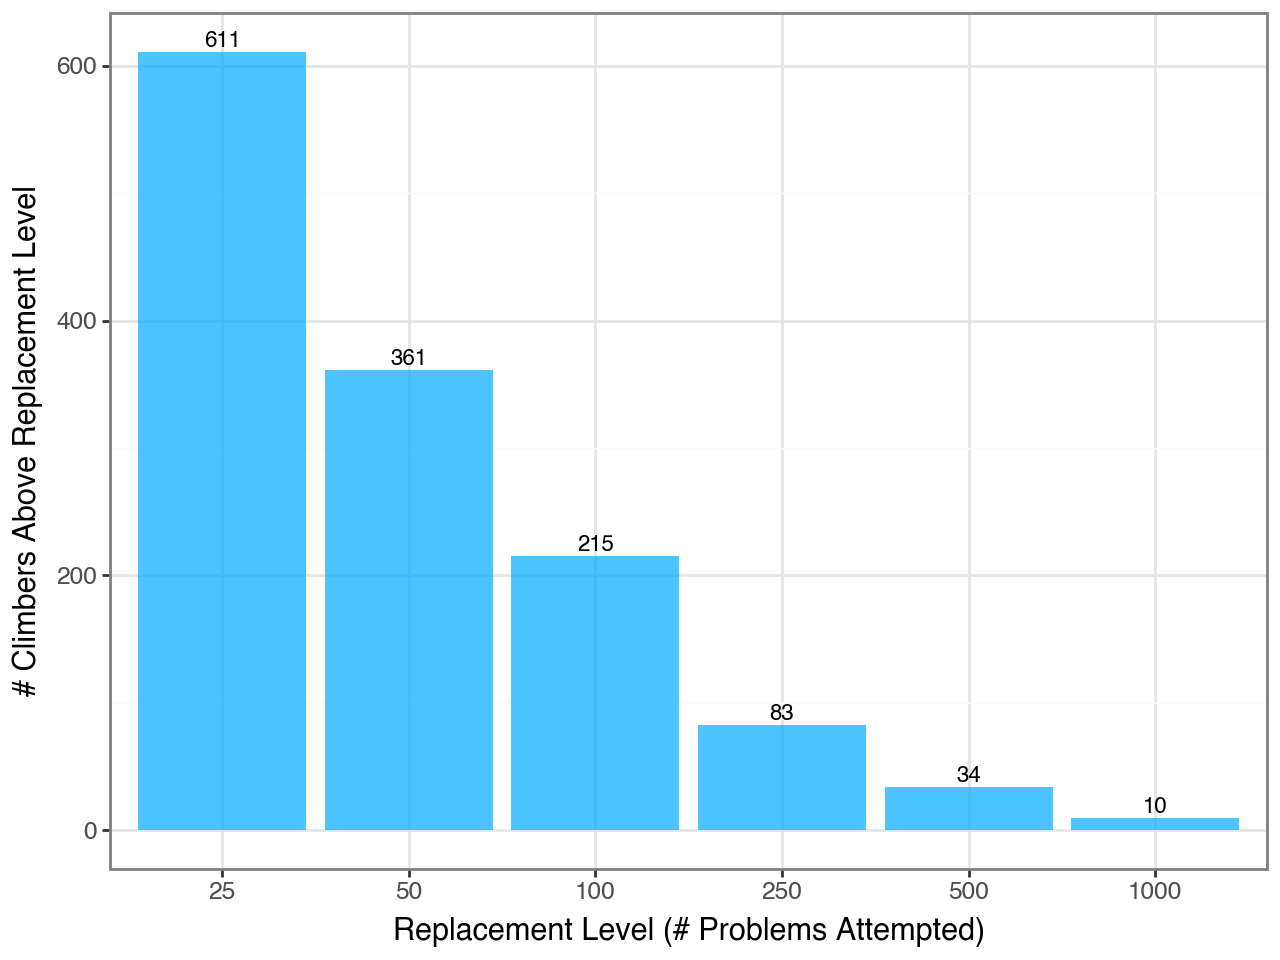

In [85]:
attempt_counts = men_df['Name'].value_counts()
climbers_above = [sum(attempt_counts > level) for level in REPLACEMENT_LEVELS]
plot_df = pd.DataFrame({
        'Replacement Level': REPLACEMENT_LEVELS,
        'Climbers Above': climbers_above
    })
plot_df['Replacement Level'] = plot_df['Replacement Level'].astype('category')

p = (
    ggplot(plot_df, aes(x='Replacement Level', y='Climbers Above'))
    + geom_bar(stat='identity', fill='#00abff', alpha=0.7, width = 0.9)
    + geom_text(aes(label='Climbers Above'), va='bottom', size=8)
    + labs(
        x='Replacement Level (# Problems Attempted)',
        y='# Climbers Above Replacement Level',
    )
    + scale_x_discrete()
    + theme_bw()
)
p

### Number of Climbers for Problems Attempted (Choosing min_freq for problems)

In [47]:
attempt_counts = men_df['Problem_ID'].value_counts()
attempt_counts.median(), attempt_counts.mode()

(20.0,
 0    6
 Name: count, dtype: int64)

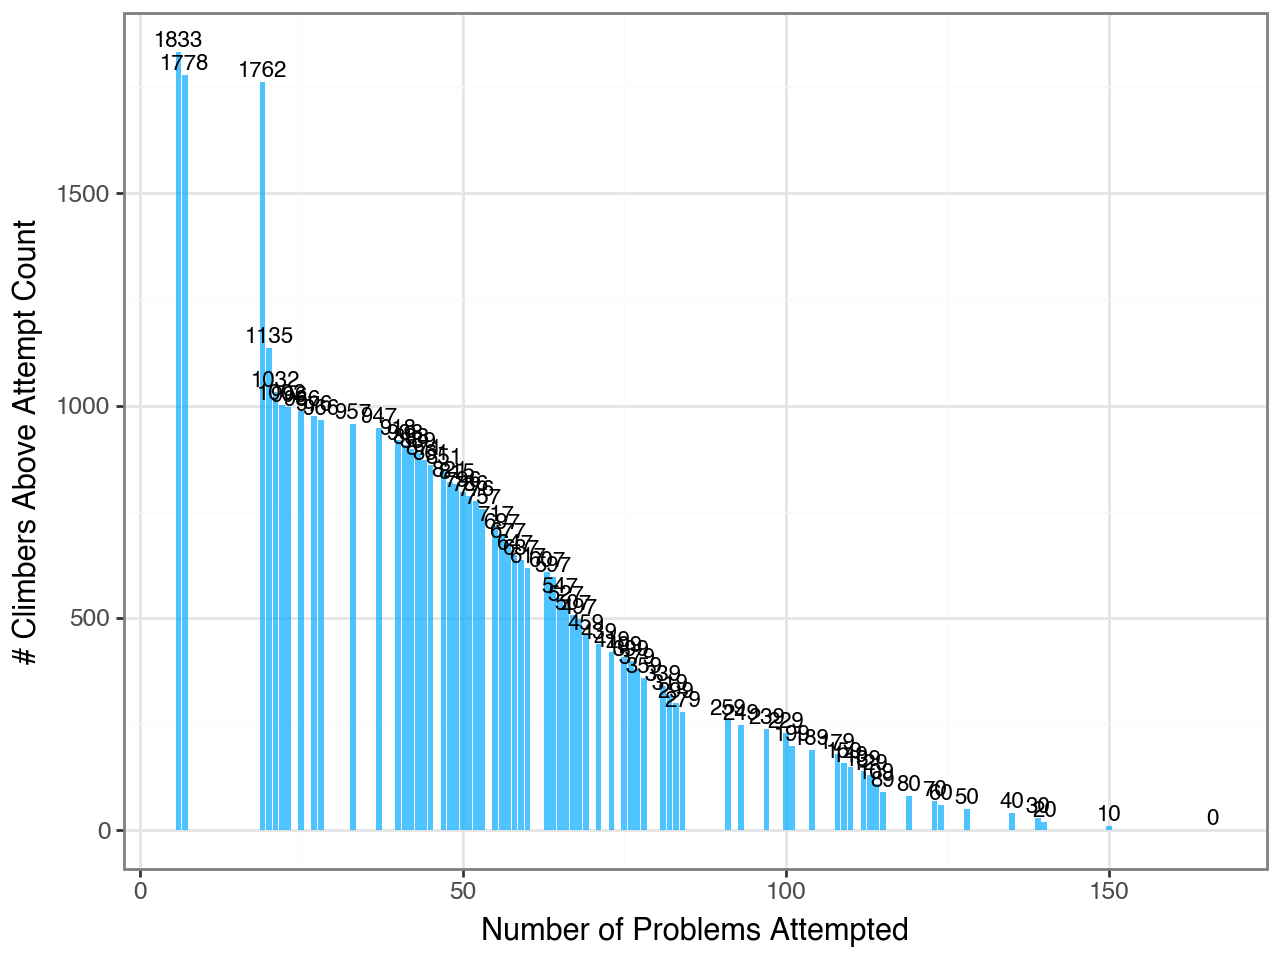

In [84]:
unique_attempts = sorted(attempt_counts.unique())
climbers_above = [sum(attempt_counts > level) for level in unique_attempts]

plot_df = pd.DataFrame({
    'Attempt Count': unique_attempts,
    'Climbers Above': climbers_above
})

plot_df['Attempt Count'] = plot_df['Attempt Count']

p = (
    ggplot(plot_df, aes(x='Attempt Count', y='Climbers Above'))
    + geom_bar(stat='identity', fill='#00abff', alpha=0.7, width=0.9) #idk i set alpha to 0.7 to lighten the color, maybe choose another color
    + geom_text(aes(label='Climbers Above'), va='bottom', size=8)
    + labs(
        x='Number of Problems Attempted',
        y='# Climbers Above Attempt Count',
    )
    + scale_x_continuous(breaks=range(0, max(unique_attempts) + 1, 50))  
    + theme_bw()
)

p

In [61]:
plot_df

,Attempt Count,Climbers Above
0,6,1833
1,7,1778
2,19,1762
3,20,1135
4,21,1032
...,...,...
65,135,40
66,139,30
67,140,20
68,150,10


### Height of climbers 

In [58]:
height_df = pd.read_csv('data/climbers_heights.csv')
height_df.head()

,Unnamed: 0,Name,ID,Height
0,0,Jernej Kruder,1124,179.0
1,2,Sean Mccoll,1559,169.0
2,5,Jan Hojer,3422,188.0
3,7,Kokoro Fujii,2272,176.0
4,9,Aleksei Rubtsov,79,178.0


In [59]:
height_df['Height'].describe()

count     65.000000
mean     175.184615
std        6.092753
min      163.000000
25%      172.000000
50%      175.000000
75%      178.000000
max      188.000000
Name: Height, dtype: float64

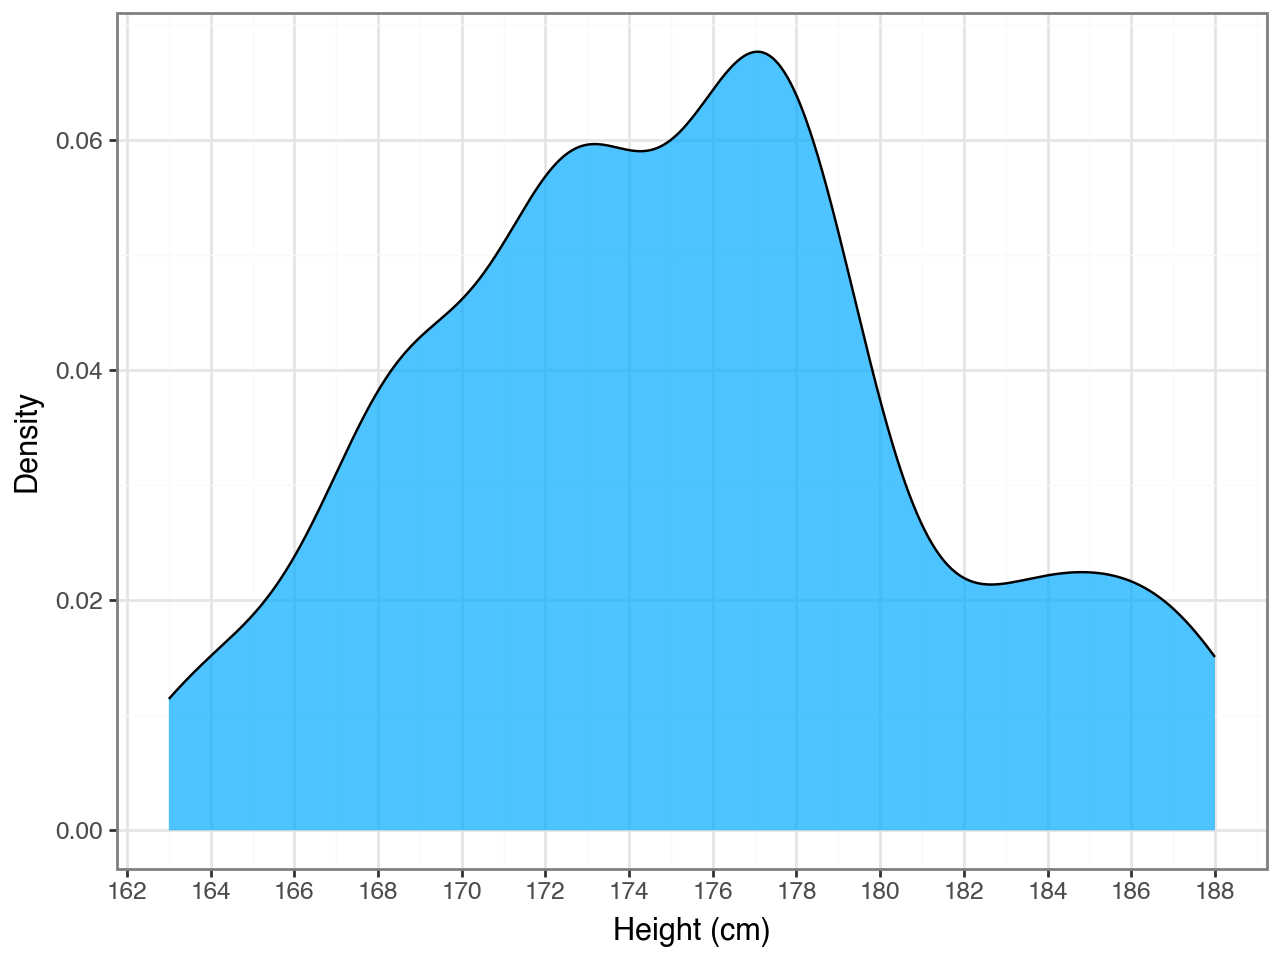

In [83]:
p = (
    ggplot(height_df, aes(x='Height'))
    + geom_density(fill='#00abff', alpha=0.7)
    + labs(x='Height (cm)', y='Density')
    + theme_bw()
    + scale_x_continuous(breaks=range(160, 191, 2))
)
p

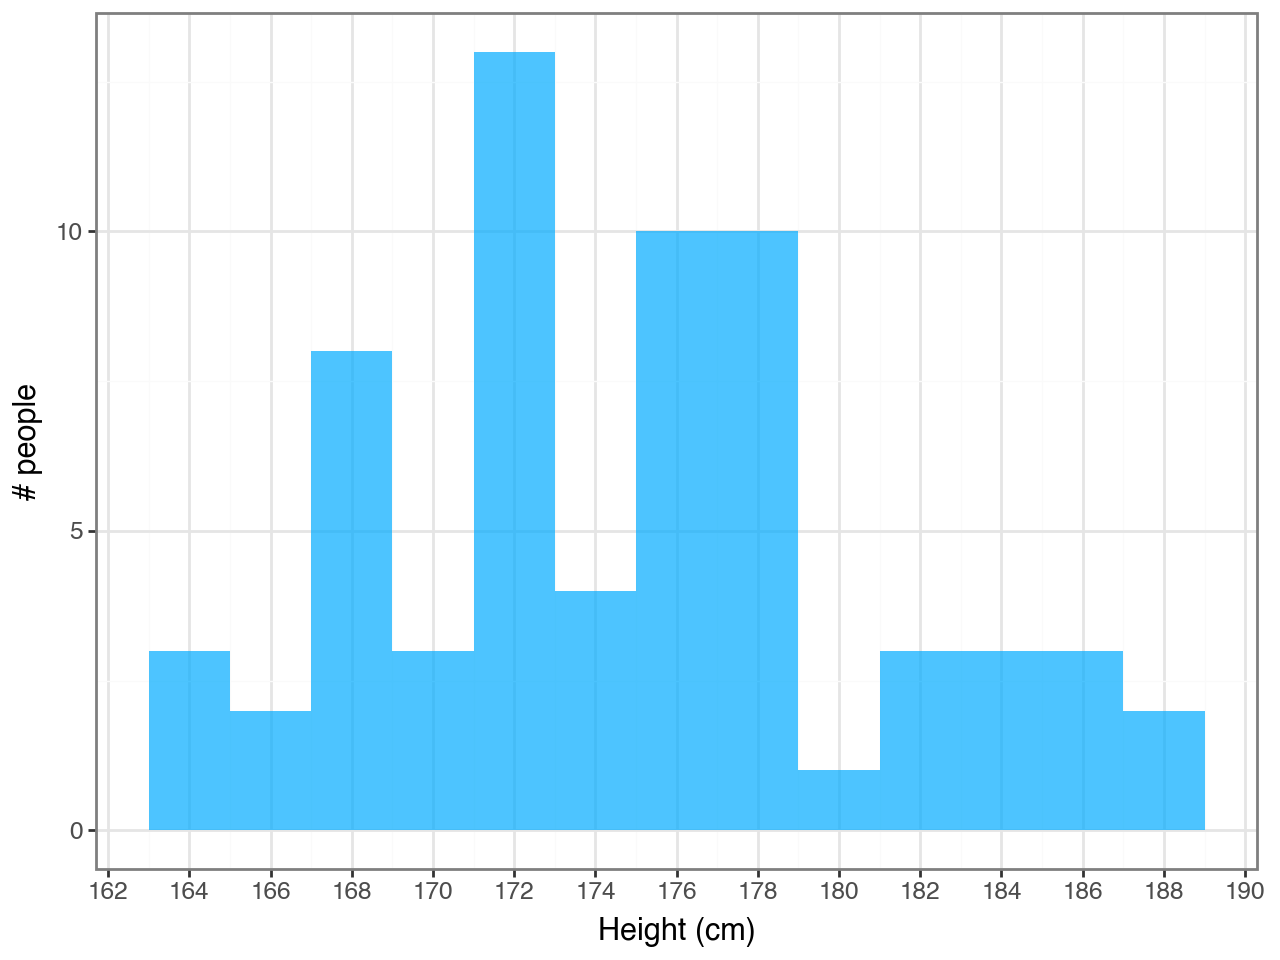

In [82]:
p = (
    ggplot(height_df, aes(x='Height'))
    + geom_histogram(binwidth=2, fill='#00abff', alpha = 0.7)
    + labs(x='Height (cm)', y='# people')
    + theme_bw()
    + scale_x_continuous(breaks=range(160, 191, 2))
)
p